In [42]:
# Leo el archivo separado por ';'
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Alu_Carreras.csv',sep=';',encoding='ISO-8859-1',parse_dates=['Fecha_Nac'], dayfirst=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24356 entries, 0 to 24355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Num_Doc           24356 non-null  object        
 1   Sexo              24356 non-null  object        
 2   Fecha_Nac         24351 non-null  datetime64[ns]
 3   Año_Ingreso       24356 non-null  int64         
 4   Semestre_Ingreso  24356 non-null  int64         
 5   Carrera           24356 non-null  object        
 6   MaxCuatri         24356 non-null  int64         
 7   cPlan             24356 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.5+ MB


,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12,2000,1,RRHH,2,6
1,0xE10C333498164394ED8003BF58453071,F,1980-09-27,2000,1,DG,1,6
2,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05,2005,1,MM,6,6
3,0xCF2B3B5C31CA26978EF09D5F4BA87967,F,1980-09-28,1999,2,RRPP,6,6
4,0x0AFCD820D89A9BFB991471142CB19D08,M,1980-10-09,2000,1,INF,6,6


In [43]:

df.describe()

,Año_Ingreso,Semestre_Ingreso,MaxCuatri,cPlan
count,24356.000000,24356.000000,24356.000000,24356.00000
mean,2004.502628,1.161603,3.920430,5.95418
std,4.336592,0.368094,2.054501,0.29924
min,1976.000000,1.000000,1.000000,4.00000
25%,2001.000000,1.000000,2.000000,6.00000
50%,2005.000000,1.000000,4.000000,6.00000
75%,2008.000000,1.000000,6.000000,6.00000
max,2011.000000,2.000000,6.000000,6.00000


In [44]:
# Removemos datos nulos
# Elimino todas las filas que contienen al menos algun dato nulo
df=df.dropna(axis=0, how='any')

df.head()

#df.describe()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12,2000,1,RRHH,2,6
1,0xE10C333498164394ED8003BF58453071,F,1980-09-27,2000,1,DG,1,6
2,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05,2005,1,MM,6,6
3,0xCF2B3B5C31CA26978EF09D5F4BA87967,F,1980-09-28,1999,2,RRPP,6,6
4,0x0AFCD820D89A9BFB991471142CB19D08,M,1980-10-09,2000,1,INF,6,6


In [46]:

# Otro cambio que nos parece importante para entrenar luego el modelo, 
# es transformar la columna Sexo, con variables discretas
# en 2 columnas Hombre y Mujer, donde un 1 implicará que la persona es de ese sexo.
df['Hombre']=(df.Sexo=='M').astype(int)
df['Mujer']=(df.Sexo=='F').astype(int)


df['Edad'] = pd.to_datetime(df['Año_Ingreso'], format='%Y') - (df.Fecha_Nac)

df['Edad'] = (df['Edad'].dt.days / 365).astype(int)
#df.plot(kind='scatter',x='MaxCuatri',y='cPlan',figsize=[7,7])

df.head()

#vemos que hay outliers en edad. Los borramos
df[df['Edad'] < 0]

indexNames = df[ df['Edad'] < 0 ].index

df.drop(indexNames , inplace=True)






In [47]:

df['Año_Ingreso'] = pd.to_datetime(df['Año_Ingreso'], format='%Y')

#vemos que el ultimo ingreso fue en el 2011, entonces tomamos como referencia ese valor para saber los desertores

df['Año_Ingreso'].max()

#vmeos que la mediana es de 21 años

df['Edad'].mean()


21.563056013179573

In [48]:
#creamos una variable para ver si es desertor o no
#tomando como referencia cantidad de años de carrera que paso del año de ingreso a 2011

df['cantAnios_Estudio'] = ((pd.to_datetime(2011,format='%Y') - df['Año_Ingreso']).dt.days / 365).astype(int)

#Si tiene menos cuatrimestres hechos que el plan y tiene 5 años de carrera lo consideramos desertor

df['Desertor']=((df.MaxCuatri<df.cPlan)&(df.cantAnios_Estudio > 5)).astype(int)

df.head()



,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Hombre,Mujer,Edad,cantAnios_Estudio,Desertor
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12,2000-01-01,1,RRHH,2,6,1,0,19,11,1
1,0xE10C333498164394ED8003BF58453071,F,1980-09-27,2000-01-01,1,DG,1,6,0,1,19,11,1
2,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05,2005-01-01,1,MM,6,6,1,0,24,6,0
3,0xCF2B3B5C31CA26978EF09D5F4BA87967,F,1980-09-28,1999-01-01,2,RRPP,6,6,0,1,18,12,0
4,0x0AFCD820D89A9BFB991471142CB19D08,M,1980-10-09,2000-01-01,1,INF,6,6,1,0,19,11,0


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

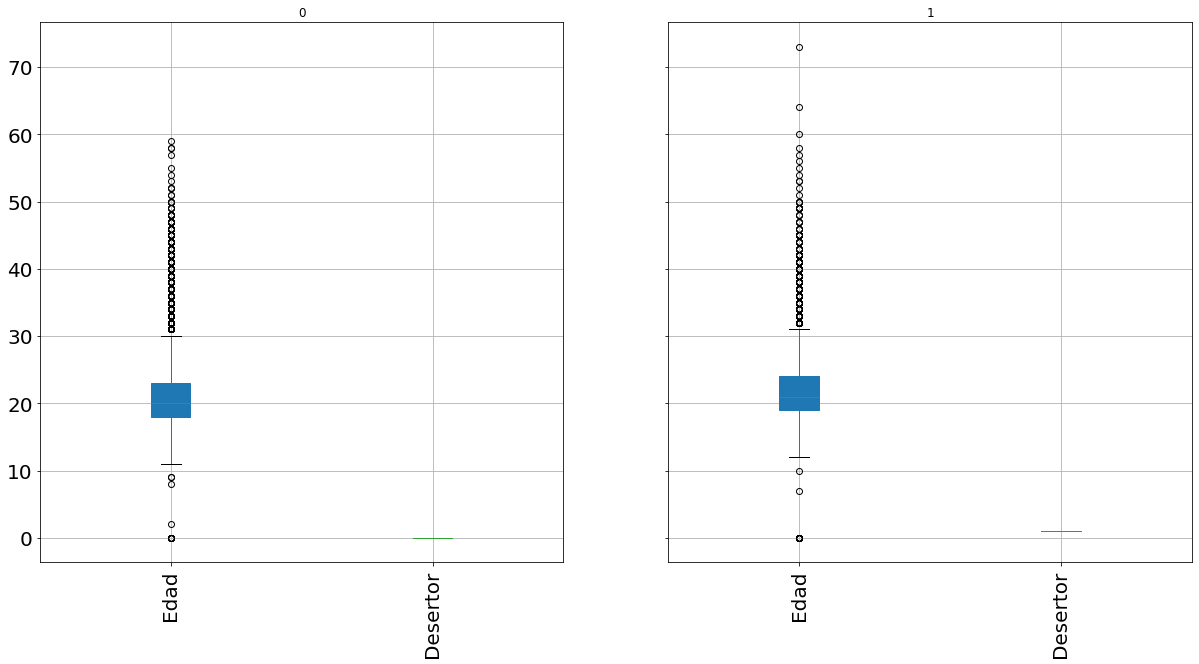

In [49]:
df2 = df.copy()

del df2['cantAnios_Estudio']
del df2['Semestre_Ingreso']
del df2['MaxCuatri']
del df2['cPlan']
del df2['Hombre']
del df2['Mujer']

#aca hacemos un boxplot de desertores, 0 para quienes no y 1 para quienes si, por Edad

#Encontramos que gran parte de los desertores, segun su edad, varia entre 18 y 25
df2.groupby('Desertor').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)


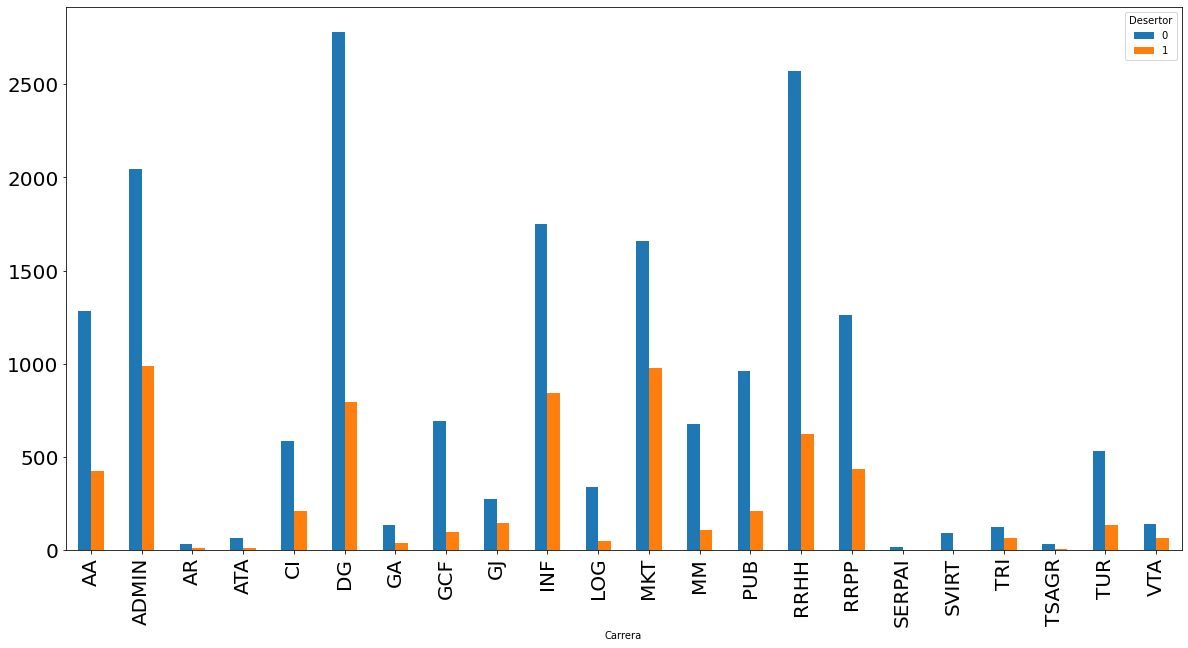

In [50]:
import matplotlib.pyplot as plt

#Groupy por carrera y desertores. 
df.groupby(['Carrera','Desertor']).size().unstack().plot(figsize=(20,10),kind='bar',stacked=False,fontsize=20)

plt.show()

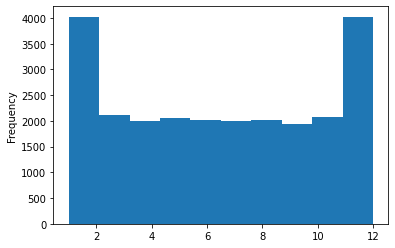

In [51]:
#vemos la distribucion de personas que ingresan, el mes que nacen. 
df['Fecha_Nac'] = pd.to_datetime(df['Fecha_Nac'], infer_datetime_format=True)

plt.clf()
df['Fecha_Nac'].map(lambda d: d.month).plot(kind='hist')
plt.show()


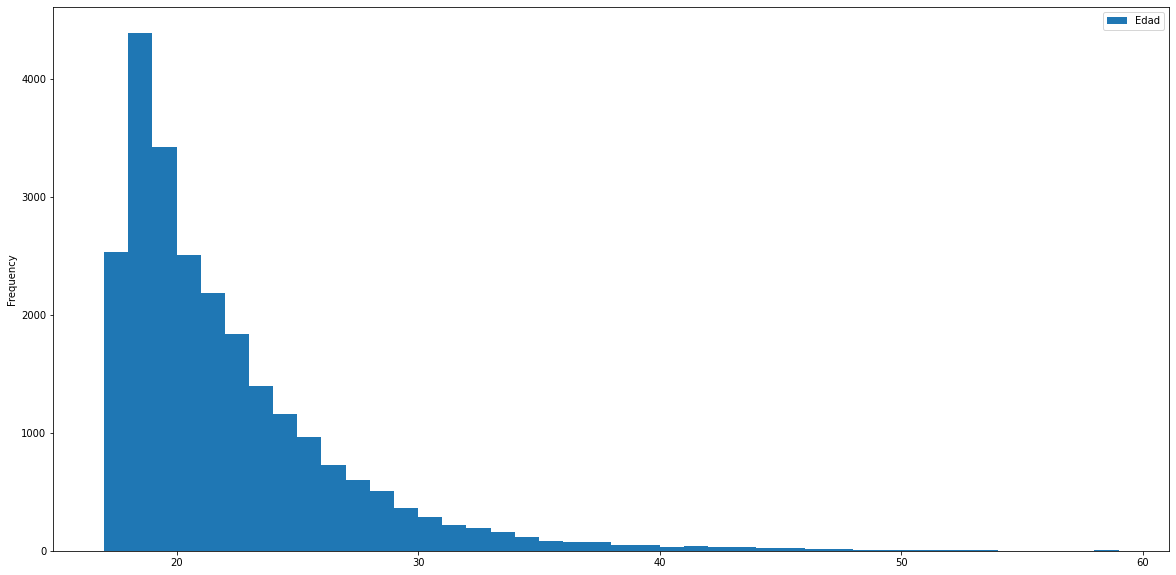

In [66]:

df[['Edad']].plot(kind='hist',bins=range(17, 60),rwidth=12,figsize=(20,10))
plt.show()

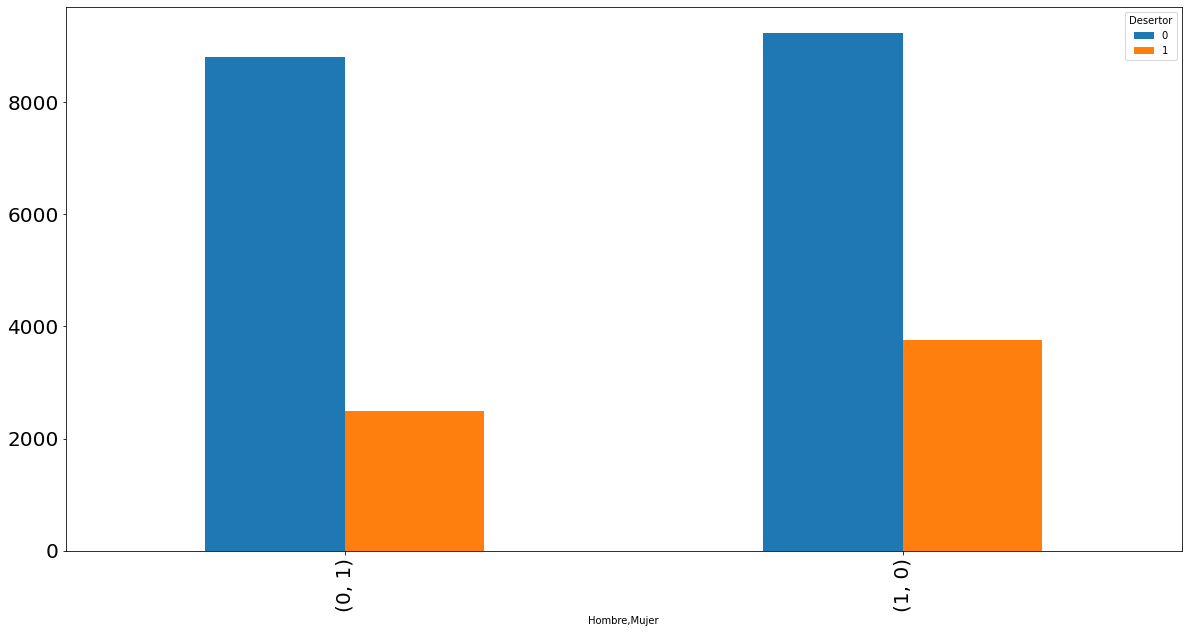

In [69]:
#Groupy por carrera y desertores. 
df.groupby(['Hombre','Mujer','Desertor']).size().unstack().plot(figsize=(20,10),kind='bar',stacked=False,fontsize=20)

plt.show()

In [71]:

dfMaterias = pd.read_csv('Alu_Materias.csv',sep=';',encoding='ISO-8859-1')
dfMaterias.info()
dfMaterias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385892 entries, 0 to 385891
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Num_Doc   385892 non-null  object 
 1   Carrera   385892 non-null  object 
 2   Año       385892 non-null  int64  
 3   Semestre  385892 non-null  int64  
 4   Materia   385892 non-null  object 
 5   Nota1     372222 non-null  float64
 6   Nota2     263179 non-null  float64
 7   Nota3     377852 non-null  float64
 8   Recup     144986 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 26.5+ MB


,Num_Doc,Carrera,Año,Semestre,Materia,Nota1,Nota2,Nota3,Recup
0,0x158153222B82FA55D9089394CC5B1029,AA,2002,1,ENTORNO ECONÓMICO,1.0,2.0,10.0,11.0
1,0xD7EA7D187F1195B412E855ECD4458371,RRHH,2009,1,RECURSOS INFORMÁTICOS,3.0,1.0,11.0,11.0
2,0xD7EA7D187F1195B412E855ECD4458371,RRHH,2009,2,DERECHO CIVIL Y COMERCIAL,3.0,5.0,6.0,7.0
3,0xD7EA7D187F1195B412E855ECD4458371,RRHH,2009,1,PSICOLOGÍA SOCIAL,7.0,5.0,7.0,NaN
4,0xD7EA7D187F1195B412E855ECD4458371,RRHH,2009,1,INGLÉS,2.0,5.0,8.0,2.0


In [84]:
#

dfMaterias.groupby(['Num_Doc']).mean()


,Año,Semestre,Nota1,Nota2,Nota3,Recup
Num_Doc,,,,,,
0x000129FB6B5438BDD6B67EBFA445A13B,2003.000000,2.000000,7.000000,7.000000,10.000000,NaN
0x0002EF737D1D58D4FE5B790A5290753F,2002.312500,1.500000,4.812500,6.500000,10.062500,6.500000
0x000335A7FEF41CE45EB4F16938E4AD72,2000.222222,1.333333,6.111111,7.222222,10.000000,8.000000
0x0003B145CABF88077B1DBFDD95C59F0C,2000.125000,1.375000,8.750000,7.125000,10.000000,8.500000
0x000534F2677B35C1B3422340960B45AF,2001.629630,1.481481,5.666667,6.833333,9.962963,5.777778
...,...,...,...,...,...,...
0xFFE8452F792919112FB2D75DC6EE3B31,2005.500000,1.500000,8.827586,8.689655,9.133333,5.000000
0xFFECB5EEB67E7E05FC865F05A21964D2,2002.750000,1.250000,7.750000,7.000000,10.000000,8.500000
0xFFF2BFCE3B9B57F72BEFE34234465B11,2011.000000,1.500000,7.300000,6.888889,8.200000,9.000000
